In [210]:
import pandas as pd
df=pd.read_csv(r"C:\Users\mungi\Downloads\youtube.csv\youtube.csv")
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [212]:
df.dtypes

index                      int64
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_date              object
time_frame                object
published_day_of_week     object
publish_country           object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

In [214]:
df.isnull().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [216]:
df.columns

Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [297]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ------------------------
# Initialize sentiment analyzer
# ------------------------
sid = SentimentIntensityAnalyzer()

# ------------------------
# Define function to extract compound score
# ------------------------
def get_compound(text):
    if pd.isna(text):  # handle missing values
        return 0
    return sid.polarity_scores(str(text))['compound']

# ------------------------
# Apply sentiment analysis (no duplicates)
# ------------------------
df['title_compound'] = df['title'].apply(get_compound)
df['tag_compound'] = df['tags'].apply(get_compound)

# ------------------------
# Assign sentiment labels
# ------------------------
df['title_sentiment_label'] = pd.cut(
    df['title_compound'],
    bins=[-1, -0.05, 0.05, 1],
    labels=['negative', 'neutral', 'positive']
)

df['tags_sentiment_label'] = pd.cut(
    df['tag_compound'],
    bins=[-1, -0.05, 0.05, 1],
    labels=['negative', 'neutral', 'positive']
)

# ------------------------
# Final check
# ------------------------
print(df[['title', 'title_compound', 'title_sentiment_label',
          'tags', 'tag_compound', 'tags_sentiment_label']].head())


                                               title  title_compound  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE          0.0772   
1  The Trump Presidency: Last Week Tonight with J...          0.0000   
2  Racist Superman | Rudy Mancuso, King Bach & Le...         -0.6124   
3                   Nickelback Lyrics: Real or Fake?         -0.4767   
4                           I Dare You: GOING BALD!?          0.0000   

  title_sentiment_label                                               tags  \
0              positive                                    SHANtell martin   
1               neutral  last week tonight trump presidency|"last week ...   
2              negative  racist superman|"rudy""|""mancuso""|""king""|"...   
3              negative  rhett and link|"gmm""|""good mythical morning"...   
4               neutral  ryan|"higa""|""higatv""|""nigahiga""|""i dare ...   

   tag_compound tags_sentiment_label  
0        0.0000              neutral  
1        0.0000     

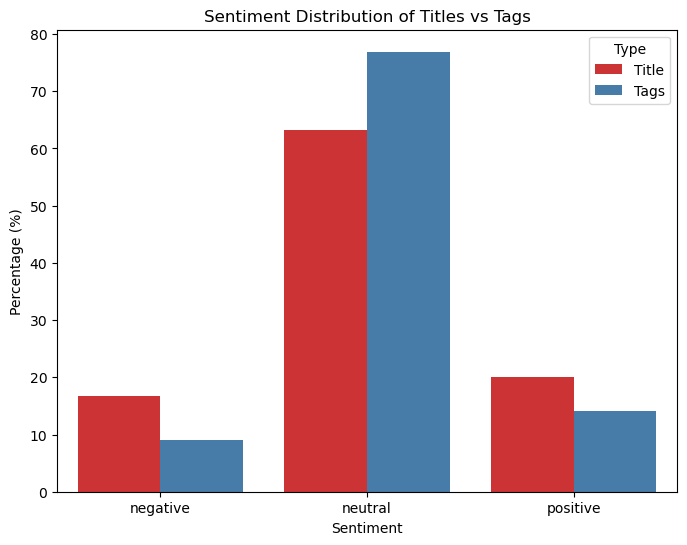

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count percentages for titles
title_counts = df['title_sentiment_label'].value_counts(normalize=True) * 100
title_df = title_counts.reset_index()
title_df.columns = ['Sentiment', 'Percentage']
title_df['Type'] = 'Title'

# Count percentages for tags
tag_counts = df['tags_sentiment_label'].value_counts(normalize=True) * 100
tag_df = tag_counts.reset_index()
tag_df.columns = ['Sentiment', 'Percentage']
tag_df['Type'] = 'Tags'

# Combine both
sentiment_df = pd.concat([title_df, tag_df])

# Plot side-by-side comparison
plt.figure(figsize=(8,6))
sns.barplot(
    x='Sentiment', 
    y='Percentage', 
    hue='Type',        # <--- This fixes the warning and gives grouped bars
    data=sentiment_df, 
    palette='Set1'
)

plt.title("Sentiment Distribution of Titles vs Tags")
plt.ylabel("Percentage (%)")
plt.show()
